<a href="https://colab.research.google.com/github/rudr19/Brain-Tumor-Survival-Time-Prediction/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Necessary Libraries***

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Replace 'your_file.csv' with the actual name of your CSV file
df = pd.read_csv('BrainTumor.csv')

# Print some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV

In [5]:
df=pd.read_csv('BrainTumor.csv')
df

,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,NaN,NaN,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


# ***Exploratory Data Analysis(EDA)***

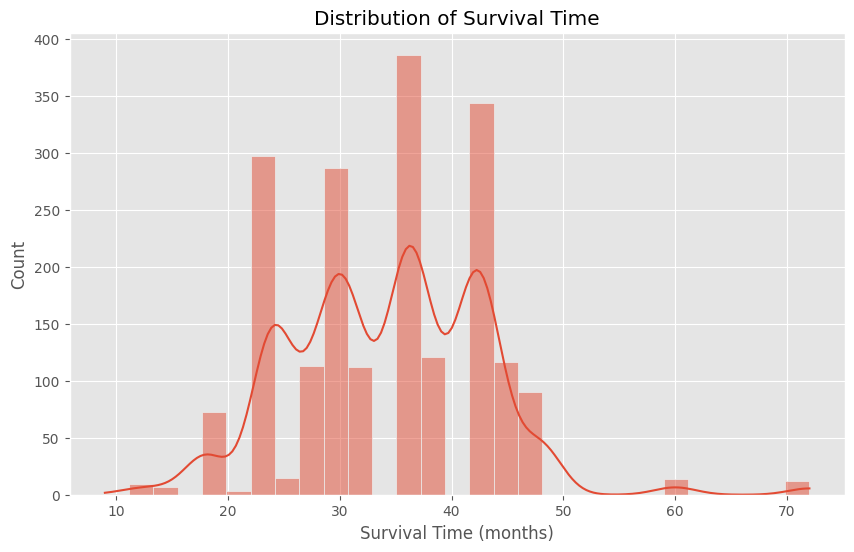

In [8]:
# Distribution of survival time
plt.figure(figsize=(10, 6))
sns.histplot(df['Survival Time (months)'], kde=True)
plt.title('Distribution of Survival Time')
plt.show()

# ***Proportion Of Different Categories***

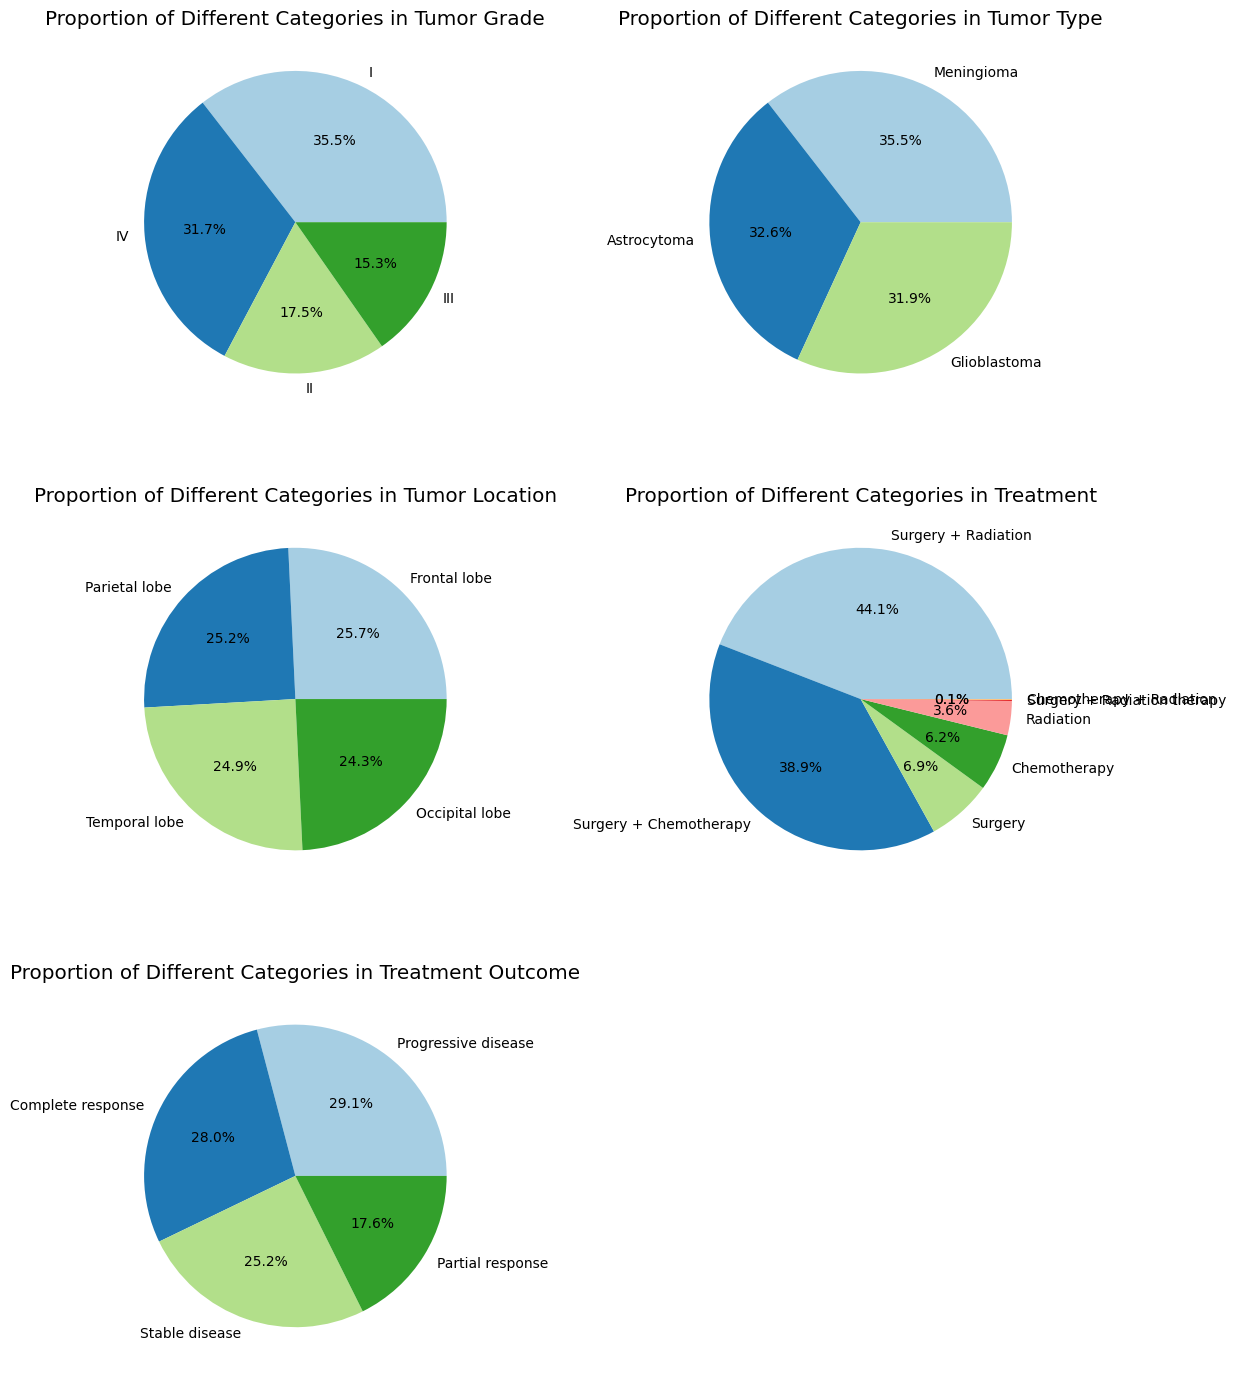

In [9]:
features = ['Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    counts = df[column].value_counts()
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(counts))))
    ax.set_title(f'Proportion of Different Categories in {column}')

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.show()

# ***Explore Relationships Between Features and Survival Time Using Box Plots***

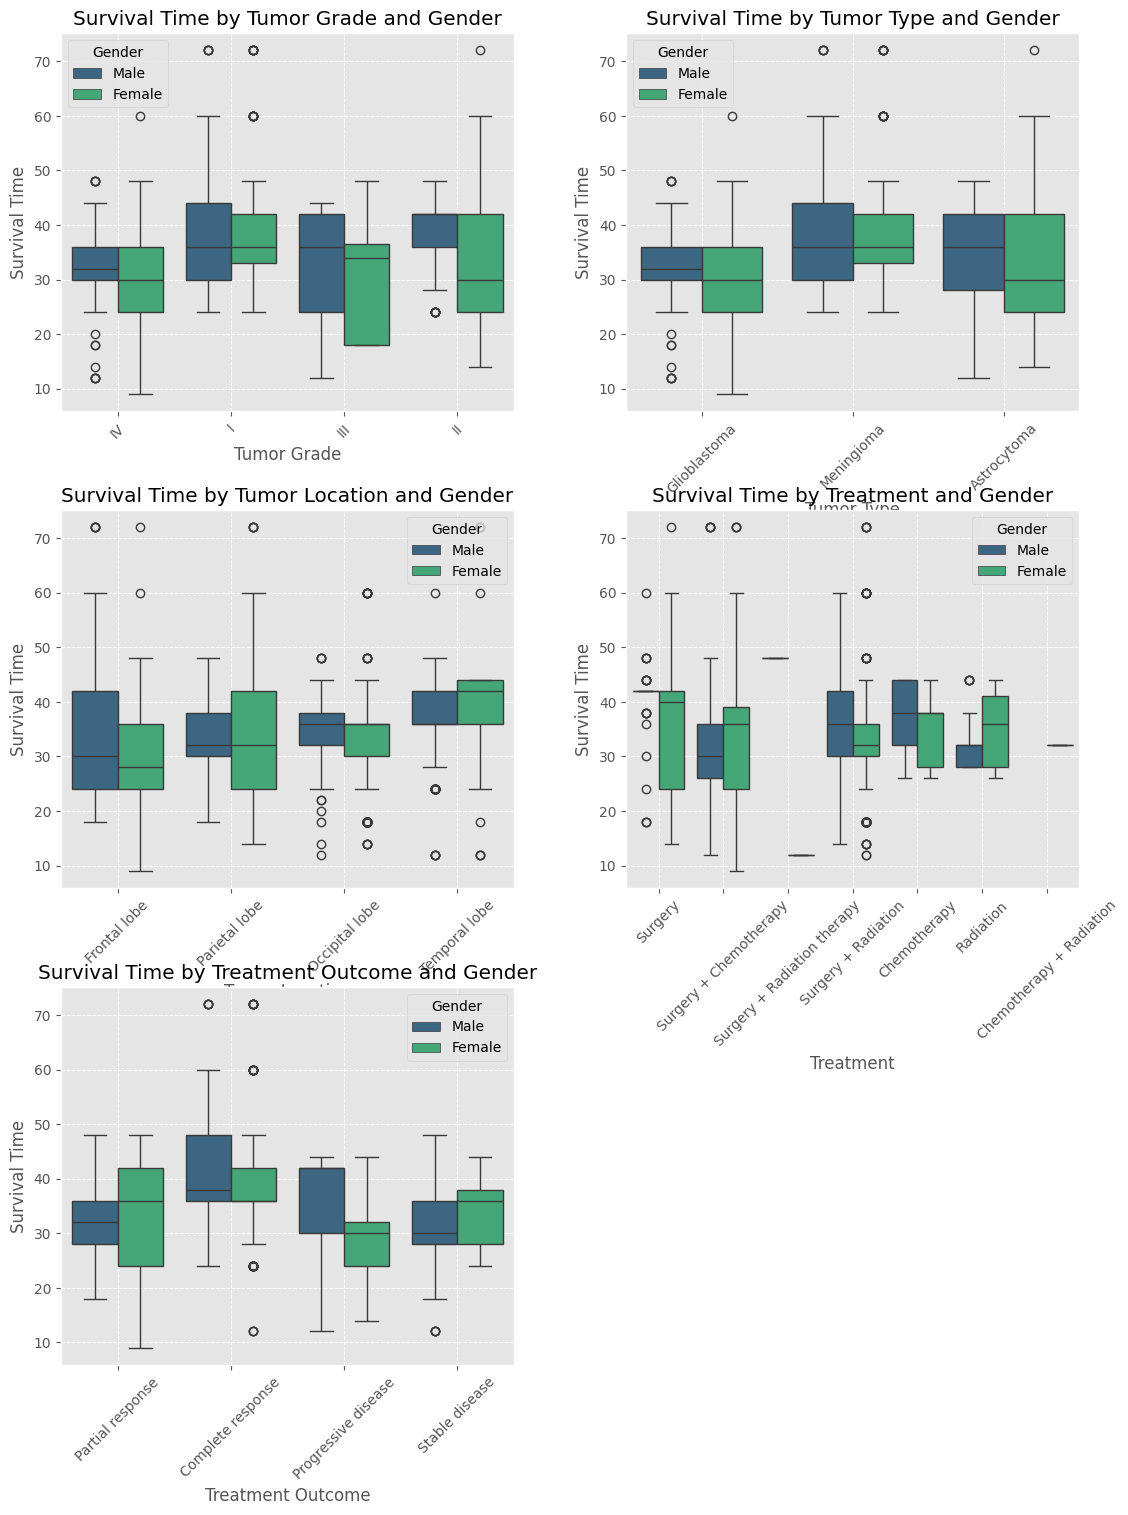

In [10]:
def plot_boxplot(column, df, ax):
    sns.boxplot(x=column, y='Survival Time (months)', data=df, hue='Gender', palette='viridis', ax=ax)
    ax.set_title(f'Survival Time by {column} and Gender')
    ax.set_xlabel(column)
    ax.set_ylabel('Survival Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)  # Add grid lines

features = ['Tumor Grade', 'Tumor Type', 'Tumor Location', 'Treatment', 'Treatment Outcome']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

for i, column in enumerate(features):
    ax = axes[i // 2, i % 2]  # Determine the current subplot axis
    plot_boxplot(column, df, ax)

# Remove the empty subplot if there are fewer features than subplots
if len(features) < 6:
    fig.delaxes(axes[2, 1])

plt.show()


# ***Explore Relationships Between Features and Survival Time Using Bar Plots***

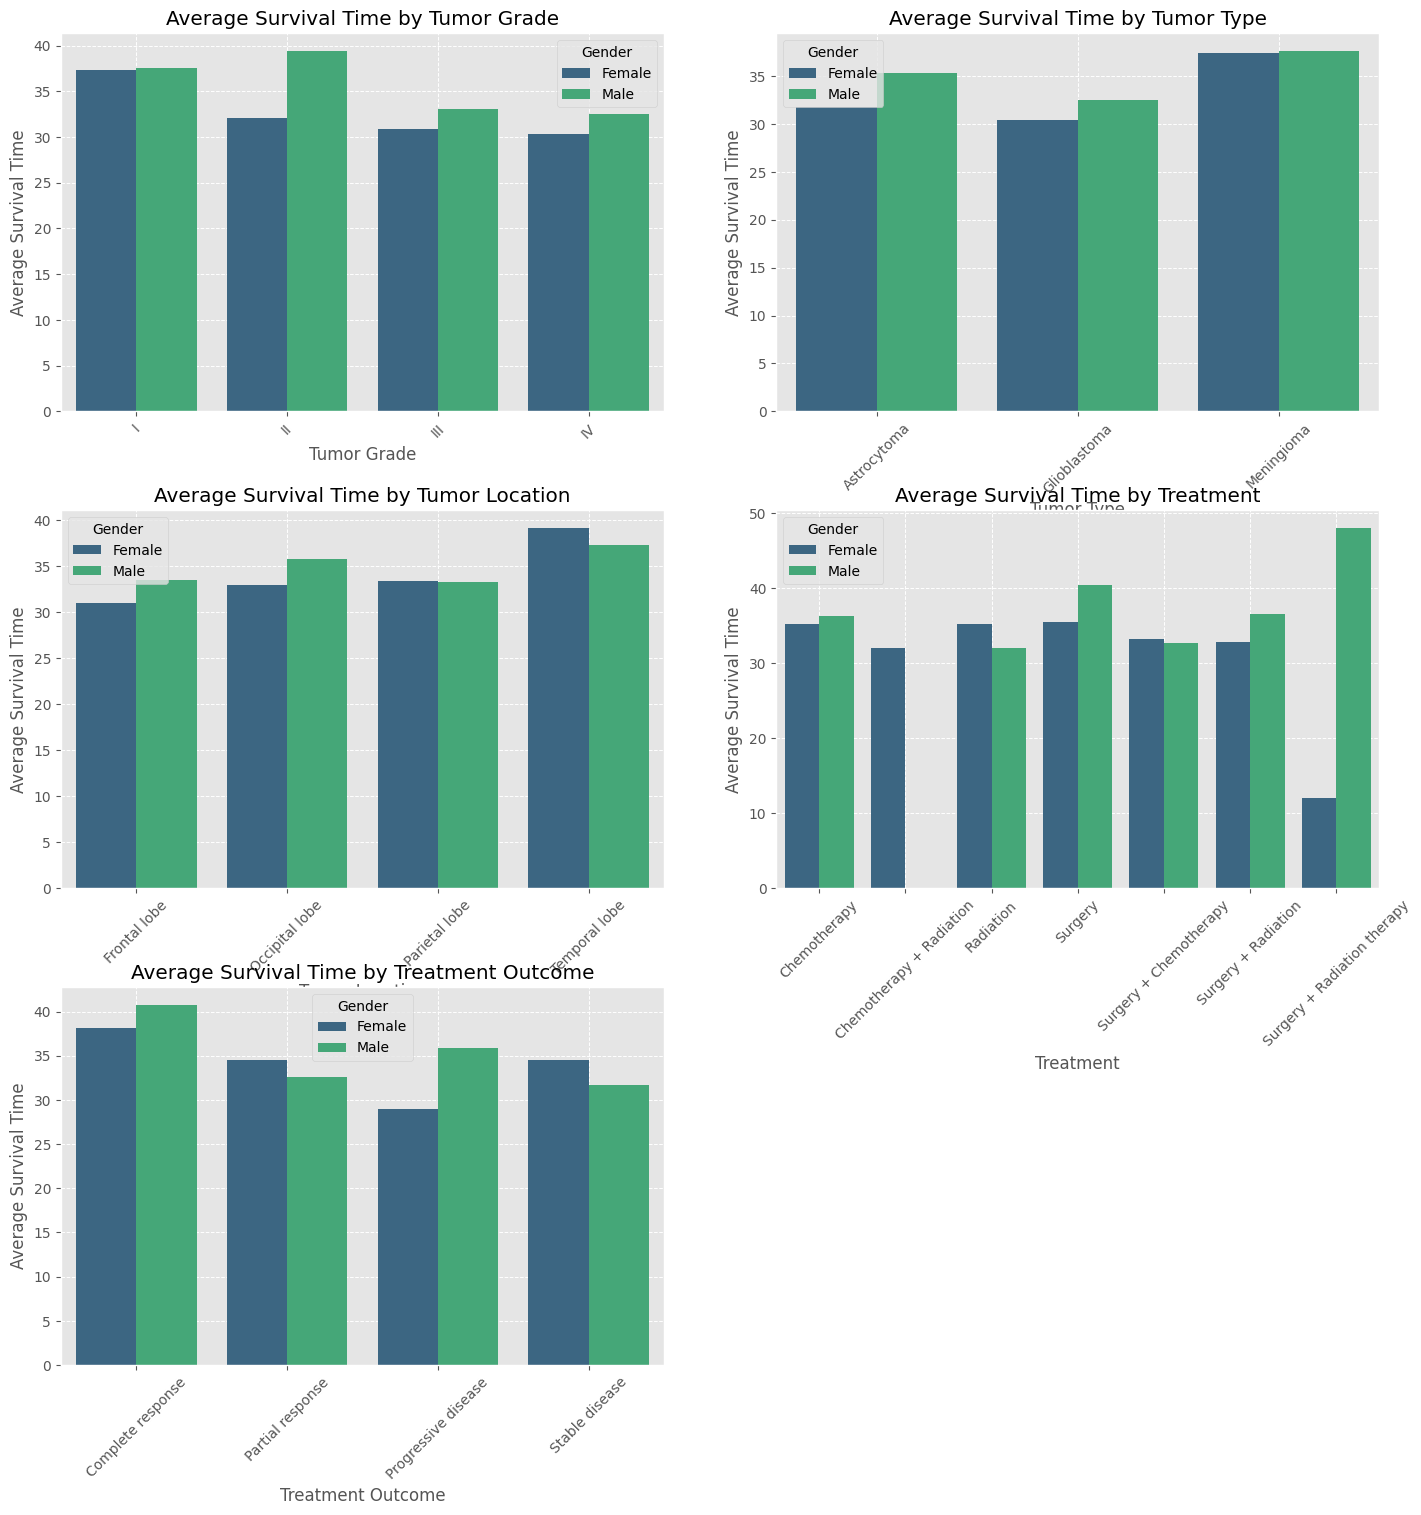

In [11]:
 def plot_bar_with_survival_time(column, df, ax):
    # Aggregating survival time by category
    survival_data = df.groupby([column, 'Gender'])['Survival Time (months)'].mean().reset_index()
    survival_data = survival_data.rename(columns={'Survival Time (months)': 'Average Survival Time'})

    sns.barplot(x=column, y='Average Survival Time', data=survival_data, palette='viridis', hue='Gender', ax=ax)
    ax.set_title(f'Average Survival Time by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Average Survival Time')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Plotting each subplot
plot_bar_with_survival_time('Tumor Grade', df, axes[0, 0])
plot_bar_with_survival_time('Tumor Type', df, axes[0, 1])
plot_bar_with_survival_time('Tumor Location', df, axes[1, 0])
plot_bar_with_survival_time('Treatment', df, axes[1, 1])
plot_bar_with_survival_time('Treatment Outcome', df, axes[2, 0])

# Remove empty subplot
fig.delaxes(axes[2, 1])

plt.show()

# ***Data Preprocessing***

<div style="background-color:#e6f9e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:1px solid #b3d9b3; margin-top: 20px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#2e8b57; text-align: center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.2);">
        Data Preprocessing
    </h2>
    <h3 style="font-size:20px; font-family:Georgia, serif; color:#2e8b57;">
        Handling Missing Values
    </h3>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        In this analysis, three approaches were used to handle missing values in the dataset, and their impacts on model performance were evaluated.
    </p>
    <h4 style="font-size:18px; font-family:Georgia, serif; color:#2e8b57;">
        Dropping Columns with Missing Values:
    </h4>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        Initially, columns containing missing values were dropped from the dataset. While this approach simplifies the data, it may lead to a loss of potentially valuable information if many columns are removed.
    </p>
    <h4 style="font-size:18px; font-family:Georgia, serif; color:#2e8b57;">
        Dropping Rows with Missing Values:
    </h4>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        In a second approach, rows with missing values were removed instead of columns. By retaining columns but removing rows with incomplete data, the model could leverage more features and achieve a better fit. The improved model performance indicates that removing rows with missing values is more effective for this dataset, leading to a more accurate model for predicting survival time. This approach preserves the richness of the features while ensuring that the remaining data is complete and usable for model training.
    </p>
    <h4 style="font-size:18px; font-family:Georgia, serif; color:#2e8b57;">
        Imputation Methods:
    </h4>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        In the third approach, missing values were handled by imputing with mean and mode values for specific columns:
        <ul>
            <li><b>Time to Recurrence (months)</b>: Missing values were filled with the mean value of the column.</li>
            <li><b>Recurrence Site</b>: Missing values were filled with the mode (most frequent value) of the column.</li>
        </ul>
        This method maintained more data compared to dropping rows or columns, leading to better predictive accuracy than dropping columns with missing values. It provided a balanced method of handling missing values, preserving the dataset's integrity.
    </p>
    <h4 style="font-size:18px; font-family:Georgia, serif; color:#2e8b57;">
        Summary:
    </h4>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        The choice of data handling techniques significantly affects model performance. Dropping rows with missing values emerged as the most effective approach, achieving the highest model performance. The imputation method provided a middle-ground approach, balancing data retention and model performance. Dropping columns with missing values was the least effective, resulting in the lowest model performance.
    </p>
</div>

# ***First Approach: Dropping Features with Missing Values***

In [12]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome',
       'Time to Recurrence (months)', 'Recurrence Site',
       'Survival Time (months)'],
      dtype='object')

In [13]:
df[['Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome']]

,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome
0,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response
1,Female,Meningioma,I,Parietal lobe,Surgery,Complete response
2,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease
3,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response
4,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response
...,...,...,...,...,...,...
1995,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease
1996,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response
1997,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response
1998,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease


# ***Categorical Encoding:Label Encoding***

<div style="background-color:#e6f9e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:1px solid #b3d9b3; margin-top: 20px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#2e8b57; text-align: center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.2);">
        Categorical Encoding
    </h2>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        For encoding categorical variables, <b>Label Encoding</b> was used instead of <b>One-Hot Encoding</b>.
    </p>
    <h3 style="font-size:20px; font-family:Georgia, serif; color:#2e8b57;">
        Label Encoding
    </h3>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        This technique was chosen for its simplicity and efficiency. It converts categorical values into numeric labels, where each unique category is assigned a distinct integer. This method is particularly suitable when the categorical variables have a natural ordering or when the number of categories is manageable.
     
</div>

In [14]:
label_encoder = LabelEncoder()
df1=df[['Gender', 'Tumor Type', 'Tumor Grade',
       'Tumor Location', 'Treatment', 'Treatment Outcome']]
encoded_df=pd.DataFrame()
for column in df1.columns:
    encoded_df[column + '_encoded'] = label_encoder.fit_transform(df1[column])

In [15]:
df['Age']

,Age
0,45
1,55
2,60
3,50
4,65
...,...
1995,49
1996,57
1997,45
1998,62


In [16]:
encoded_df['Age']=df['Age']

In [17]:
x=encoded_df
y=df['Survival Time (months)']

In [18]:
x

,Gender_encoded,Tumor Type_encoded,Tumor Grade_encoded,Tumor Location_encoded,Treatment_encoded,Treatment Outcome_encoded,Age
0,1,1,3,0,3,1,45
1,0,2,0,2,3,0,55
2,1,0,2,1,4,2,60
3,0,1,3,3,6,0,50
4,1,0,1,0,6,1,65
...,...,...,...,...,...,...,...
1995,0,2,0,2,2,2,49
1996,1,1,3,1,3,0,57
1997,0,2,0,3,0,1,45
1998,1,0,2,0,2,3,62


In [19]:
y

,Survival Time (months)
0,18
1,36
2,22
3,12
4,48
...,...
1995,32
1996,38
1997,44
1998,28


# ***Feature Scaling***

<div style="background-color:#e6f9e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:1px solid #b3d9b3; margin-top: 20px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#2e8b57; text-align: center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.2);">
        Feature Scaling
    </h2>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        Standard Scaling was applied to the dataset instead of normalization.
    </p>
    <h3 style="font-size:20px; font-family:Georgia, serif; color:#2e8b57;">
        Standard Scaling
    </h3>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        This technique standardizes features by removing the mean and scaling to unit variance. Standard Scaling is effective for models that assume normally distributed data, such as linear models and gradient boosting algorithms. It ensures that each feature contributes equally to the model by transforming the features to have a mean of 0 and a standard deviation of 1.
    </p>
</div>


In [20]:
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_features, columns=x.columns)

In [21]:
X=scaled_df

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
y_test

,Survival Time (months)
1860,36
353,36
1333,38
905,30
1289,38
...,...
965,30
1284,44
1739,42
261,42


# ***Model Building***

In [24]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
# Train and evaluate the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost R² score:", r2_xgb)

# Train and evaluate the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
r2_svm = r2_score(y_test, y_pred_svm)
print("SVM R² score:", r2_svm)

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree R² score:", r2_dt)

# Train and evaluate the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression R² score:", r2_lr)

# Train and evaluate the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN R² score:", r2_knn)

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting Regressor R² score:", r2_gbr)

XGBoost R² score: 0.7195537950230604
SVM R² score: 0.36491780997125634
Decision Tree R² score: 0.6313166038563928
Linear Regression R² score: 0.20762888784466527
KNN R² score: 0.5822924845232587
Gradient Boosting Regressor R² score: 0.506994403086096


<div style="background-color:#e6f9e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:1px solid #b3d9b3; margin-top: 20px;">
    <h2 style="font-size:24px; font-family:Georgia, serif; color:#2e8b57; text-align: center; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.2);">
 Model Performance
    </h2>
    <p style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        The performance of different regression algorithms was evaluated based on their R² scores, which measure the proportion of variance explained by the model. Below are the R² scores for each model:
    </p>
    <ul style="font-size:16px; font-family:Georgia, serif; line-height: 1.6; color:#333;">
        <li><b>XGBoost</b>: R² score = 0.7196
            <ul>
                <li>XGBoost performed the best among the models tested, achieving an R² score of approximately 0.72. This indicates a relatively good fit to the data, explaining around 72% of the variance in survival time.</li>
            </ul>
        </li>
    </ul>
</div>

# ***XGBoost with Hyperparameter Tuning***

In [30]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],            # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1],        # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1],
    }       # L2 regularization term on weights

In [31]:
# Initialize the XGBoost regressor
xgb_model = XGBRegressor()

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=50,
                                       scoring='r2', cv=5, verbose=1, random_state=42)

# Perform randomized search on the training data
randomized_search.fit(X_train, y_train)

# Print the best parameters and best R² score
print("Best parameters found: ", randomized_search.best_params_)
print("Best R² score: {:.2f}".format(randomized_search.best_score_))

# Get the best model
best_xgb_model = randomized_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best R² score: 0.73
Test R² score: 0.74


In [32]:
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.5,
    'reg_alpha': 0.1,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.8
}

xgb_model = XGBRegressor(**best_params)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print("Test R² score: {:.2f}".format(r2))

Test R² score: 0.75
